In [1]:
from sklearn.linear_model import LogisticRegression
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.SimulatedAnnealing import SimulatedAnnealing
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.TPEChi2 import TPEChi2
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.SFS import SFS
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.DataLoader import DataLoader
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.QueryOptimizer import QueryOptimizer
import numpy as np
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

In [2]:
dl = DataLoader()
X_train, X_validation, X_test, y_train, y_validation, y_test, feature_names, sensitive_ids = dl.get_data(dataset='Adult')

In [ ]:
sa_nr = SimulatedAnnealing()
sa_nr.query(X_train,
			X_validation,
			X_test,
			y_train,
			y_validation,
			y_test,
			classifier=LogisticRegression(class_weight='balanced'),
			min_accuracy=0.9,
			sensitive_ids=sensitive_ids,
			min_fairness=0.0,
			min_safety=0.0,
			min_privacy=None,
			max_complexity=1.0,
			max_search_time=60,
			feature_names=feature_names
			)

[0.461   0.46375 0.62625 0.506   0.4305  0.094   0.1615  0.432   0.359
 0.4825  0.10225 0.171   0.49025 0.173   0.48125 0.46625 0.4735 ]
17
17


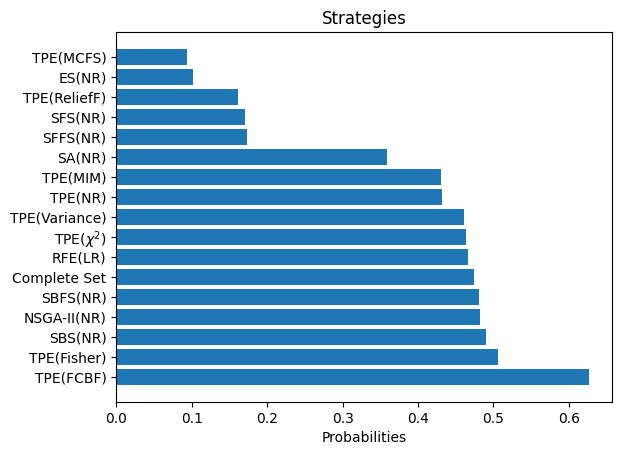

In [3]:
optimizer = QueryOptimizer()
optimizer.get_plan(X_train,
			X_validation,
			X_test,
			y_train,
			y_validation,
			y_test,
			classifier=LogisticRegression(class_weight='balanced'),
			min_accuracy=0.9,
			sensitive_ids=sensitive_ids,
			min_fairness=0.0,
			min_safety=0.0,
			min_privacy=None,
			max_complexity=1.0,
			max_search_time=60,
			feature_names=feature_names
			)

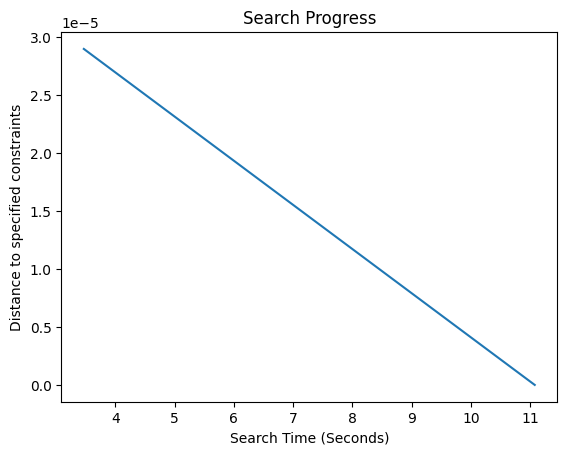

In [5]:
sa_nr.get_progress()

In [6]:
fig = sa_nr.get_test_radar_chart()
iplot(fig) 